# Homework 1

#### Qingwen Wang

Use the examples in the notebook from class to do the following:

1. Fit a logistic regression classifier. How accurate is your model at predicting the correct class? Is the model underfitting or overfitting the data? Explain.

2. Use cross validation to fit logistic regression models whose decision boundaries are polynomial, with degrees 1,2,3,4, and 5. Which model would you choose based on the cross validation scores (i.e., the average model accuracy over the 5 folds)?

(In 1 and 2, be sure to evaluate your models on test data that the classifier hasn't seen!)

3. Do you think your classifier could be significantly improved by a more flexible method? Why or why not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
cluster = pd.read_csv('cluster_hw.csv')
cluster.head()

,Unnamed: 0,feat1,feat2,Class
0,0,1.126107,-0.363169,0
1,1,0.380427,0.381545,1
2,2,-0.095709,-0.350235,1
3,3,1.182031,0.046286,0
4,4,-0.657046,1.106598,0


In [3]:
cluster.drop(['Unnamed: 0'], axis=1)

,feat1,feat2,Class
0,1.126107,-0.363169,0
1,0.380427,0.381545,1
2,-0.095709,-0.350235,1
3,1.182031,0.046286,0
4,-0.657046,1.106598,0
...,...,...,...
1495,-1.056678,-0.782838,0
1496,-1.117567,0.615330,0
1497,-0.657347,-1.055618,0
1498,-0.586562,-1.022173,0


<AxesSubplot:xlabel='feat1', ylabel='feat2'>

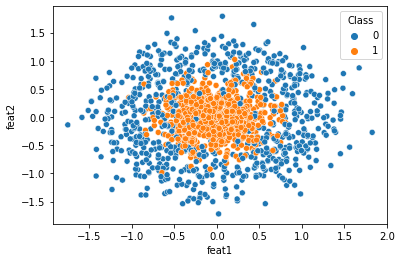

In [4]:
sns.scatterplot(x='feat1',y='feat2',hue='Class',data=cluster)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X=cluster[['feat1','feat2']]
Y=cluster['Class']

In [9]:
Y.__class__

pandas.core.series.Series

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [11]:
LR1 = LogisticRegression().fit(X_train, Y_train)

In [15]:
LR1.score(X_train, Y_train)

0.6447619047619048

In [18]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(LR1.predict(X_test),Y_test)

0.6222222222222222

In [21]:
accuracy_score(LR1.predict(X_train),Y_train)

0.6447619047619048

In [28]:
cluster['Class'].value_counts()

0    750
1    750
Name: Class, dtype: int64

The original dataset is 50 to 50 by ```Class```. The accurancy of model LR1 for test set is 0.62, it can predict something, but still very random; then we look at the accurancy of the training set, the accurancy is also not high, so we can conclude that it is underfitted. We need to add more variables to make it more predictable.

In [29]:
X['f12']=X['feat1']**2 
X['f22']=X['feat2']**2
X['f13']=X['feat1']**3
X['f23']=X['feat2']**3
X['f14']=X['feat1']**4
X['f24']=X['feat2']**4
X['f15']=X['feat1']**5
X['f25']=X['feat2']**5

<ipython-input-29-59eeb90d4277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['f12']=X['feat1']**2


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [32]:
from sklearn.model_selection import cross_validate

In [35]:
lcv1_results = cross_validate(LogisticRegression(), X_train[['feat1','feat2']], Y_train, cv=5,scoring='accuracy')
lcv2_results = cross_validate(LogisticRegression(), X_train[['feat1','feat2','f12','f22']], Y_train, cv=5,scoring='accuracy')
lcv3_results = cross_validate(LogisticRegression(), X_train[['feat1','feat2','f12','f22','f13','f23']], Y_train, cv=5,scoring='accuracy')
lcv4_results = cross_validate(LogisticRegression(), X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24']], Y_train, cv=5,scoring='accuracy')
lcv5_results = cross_validate(LogisticRegression(), X_train[['feat1','feat2','f12','f22','f13','f23','f14','f24','f15','f25']], Y_train, cv=5,scoring='accuracy')

Text(0, 0.5, 'accuracy')

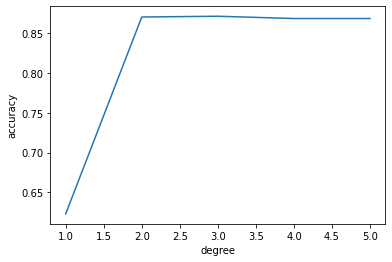

In [38]:
cvs = [lcv1_results['test_score'].mean(),lcv2_results['test_score'].mean(),lcv3_results['test_score'].mean(),lcv4_results['test_score'].mean(),lcv5_results['test_score'].mean()]
degs=[1,2,3,4,5]
plt.plot(degs,cvs)
plt.xlabel('degree')
plt.ylabel('accuracy')

Choose degree 2. <br>
Since when degree is 2, the accuracy reaches almost highest; and even degree 3 reaches higher score, but it is very very tiny. So here we can keep degree 2 to have lower variance.

In [64]:
deg2mod=LogisticRegression().fit(X_train[['feat1','feat2','f12','f22']],Y_train)
deg3mod=LogisticRegression().fit(X_train[['feat1','feat2','f12','f22','f13','f23']],Y_train)

print(accuracy_score(LR1.predict(X_test[['feat1','feat2']]),Y_test))
print(accuracy_score(deg2mod.predict(X_test[['feat1','feat2','f12','f22']]),Y_test))
print(accuracy_score(deg3mod.predict(X_test[['feat1','feat2','f12','f22','f13','f23']]),Y_test))


0.6222222222222222
0.8911111111111111
0.8888888888888888


Degree 2 has the best result on test data; <br>
I think it is impossible to get higher score on this dataset just with a more flexible method. As we can see, the performance of degree 3 is lower than degree 2.<br>
Because there is a bia and variance trade off. Overfitting on training data will lead to less prediction power on testing data.

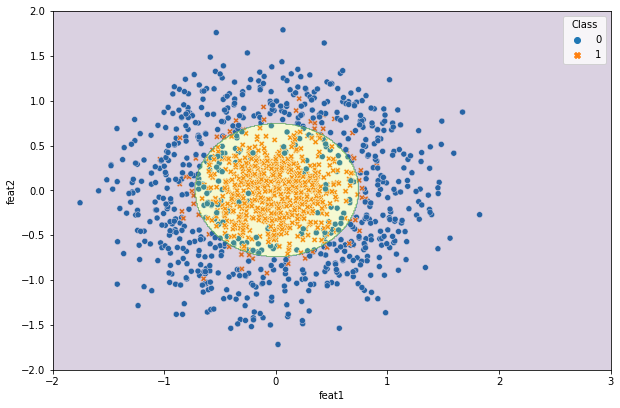

In [60]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-2, 2, 500))
x2=xx**2
y2=yy**2
X_grid = np.c_[xx.ravel(), yy.ravel(),x2.ravel(),y2.ravel()]

zz_lr2 = deg2mod.predict_proba(X_grid)[:,1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(10, 6.6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=cluster)
plt.contourf(xx, yy, zz_lr2 > 0.5, alpha=0.2)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [146]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X[['feat1','feat2']], Y, test_size=0.3, random_state=5)

In [147]:
knnres=[]
neighbour =  [i for i in range(1,50)]
for i in neighbour:
    neigh = KNeighborsClassifier(n_neighbors=i)
    knn_results = cross_validate(neigh, Xn_train, yn_train, cv=5, scoring='accuracy')
    knnres.append(knn_results['test_score'].mean())

Text(0, 0.5, 'Accuracy')

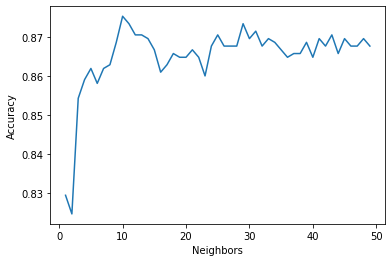

In [148]:
plt.plot(neighbour,knnres)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

In [162]:
knn5=KNeighborsClassifier(n_neighbors=5).fit(Xn_train, yn_train)
print(accuracy_score(knn5.predict(Xn_test),yn_test))
print(accuracy_score(deg2mod.predict(X_test[['feat1','feat2','f12','f22']]),Y_test))

0.9
0.8911111111111111


By using Knn, a little improvement is made. 